In [1]:
!which python

/home/bilal326/Desktop/Time_Series/venv/bin/python


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
uspop = pd.read_csv("./datasets/POPTHM-Jan2025FRED.csv")

In [5]:
uspop.head()

,observation_date,POPTHM
0,1959-01-01,175818
1,1959-02-01,176044
2,1959-03-01,176274
3,1959-04-01,176503
4,1959-05-01,176723


In [6]:
uspop.shape

(791, 2)

In [7]:
uspop.tail()

,observation_date,POPTHM
786,2024-07-01,337005
787,2024-08-01,337185
788,2024-09-01,337362
789,2024-10-01,337521
790,2024-11-01,337669


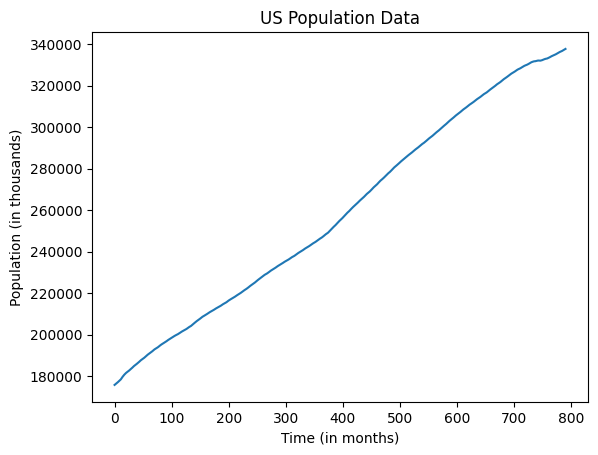

In [8]:
plt.plot(uspop['POPTHM'])
plt.xlabel("Time (in months)")
plt.ylabel("Population (in thousands)")
plt.title("US Population Data")
plt.show()

Ordinary Least Squares (OLS) linear regression

In [10]:
# Simple Linear Regression Model

import statsmodels.api as sm

# statsmodels doesn't know how to handle datetime objects inside a regression model.
# You need to convert the datetime values into numeric values, like time steps or ordinal values.
# Convert datetime to time step (e.g., 0, 1, 2, ...)
t = np.arange(len(uspop))  # or use .index if appropriate

# sm doesn't add a constant by default
# You do not choose or guess the value of the constant manually — you just tell statsmodels to include it, and it estimates the best value during training.
# X is a 2D array
X = sm.add_constant(t)

y = uspop["POPTHM"]

In [11]:
X

array([[  1.,   0.],
       [  1.,   1.],
       [  1.,   2.],
       ...,
       [  1., 788.],
       [  1., 789.],
       [  1., 790.]], shape=(791, 2))

In [12]:
y.head()

0    175818
1    176044
2    176274
3    176503
4    176723
Name: POPTHM, dtype: int64

In [13]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 POPTHM   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.422e+05
Date:                Thu, 19 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:56:10   Log-Likelihood:                -7394.9
No. Observations:                 791   AIC:                         1.479e+04
Df Residuals:                     789   BIC:                         1.480e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.748e+05    197.684    884.179      0.0

| Focus Area            | Key Metric(s)                     | Interpretation                                      |
| --------------------- | --------------------------------- | --------------------------------------------------- |
| **Model fit**         | R-squared, Adj. R²                | Excellent fit                                       |
| **Feature relevance** | Coefficients + p-values           | Strong, significant effect of time on population    |
| **Model reliability** | F-statistic + Prob(F)             | Model is statistically valid                        |
| **Assumptions check** | Durbin-Watson, JB, Skew, Kurtosis | ⚠️ Violations exist — consider time series modeling |


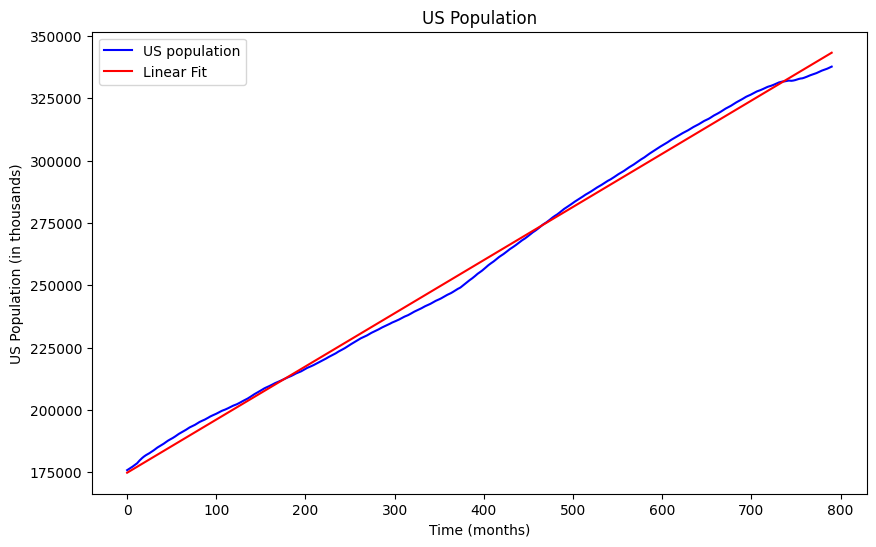

In [14]:
# Plot the original dataset along with the fitted values
plt.figure(figsize = (10, 6))
plt.plot(t, uspop['POPTHM'], label = 'US population', color = 'blue')
plt.plot(t, model.fittedvalues, label = 'Linear Fit', color = 'red')
plt.xlabel("Time (months)")
plt.ylabel("US Population (in thousands)")
plt.title("US Population")
plt.legend()
plt.show()

USA Accidents Dataset

In [15]:
USAccDeaths = pd.read_csv("./datasets/USAccDeaths.csv")
print(USAccDeaths.head(10))
print(USAccDeaths.tail(10))
print(USAccDeaths.shape)

   Unnamed: 0      x
0           1   9007
1           2   8106
2           3   8928
3           4   9137
4           5  10017
5           6  10826
6           7  11317
7           8  10744
8           9   9713
9          10   9938
    Unnamed: 0      x
62          63   7791
63          64   8192
64          65   9115
65          66   9434
66          67  10484
67          68   9827
68          69   9110
69          70   9070
70          71   8633
71          72   9240
(72, 2)


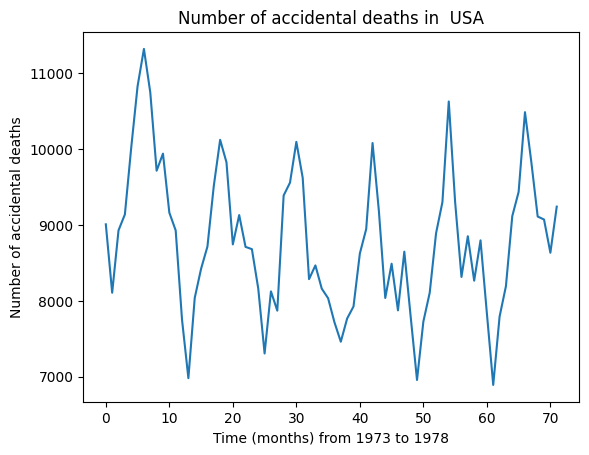

In [16]:
dt = USAccDeaths['x']
plt.plot(dt)
plt.xlabel("Time (months) from 1973 to 1978")
plt.ylabel("Number of accidental deaths")
plt.title("Number of accidental deaths in  USA")
plt.show()                

This is a time series model with seasonality

#### 🔍 Model Equation

$$
y(t) = \underbrace{\beta_0}_{\text{Intercept}} + \underbrace{\sum_{i=1}^{3} \left[ \beta_{2i-1} \cos\left(\frac{2\pi i t}{12}\right) + \beta_{2i} \sin\left(\frac{2\pi i t}{12}\right) \right]}_{\text{Seasonality (sinusoids)}} + \underbrace{\beta_7 t + \beta_8 t^2}_{\text{Trend (quadratic)}}
$$

Where:

* $t$: Time in months (1 to 72)
* $y(t)$: Monthly accidental deaths

- **Quadratic Term:** Contributes to the curvature or "bend" of the graph
- **Linear Term:** Contrributes to the slope or tilt of the graph i.e. Affects the initial direction (upward/downward) and Influences how steep or flat the curve looks at the beginning
    - "What's the overall direction of change — going up or down?"
- **Intercept:** The starting value of y when t = 0

In [17]:
USAccDeaths.head()

,Unnamed: 0,x
0,1,9007
1,2,8106
2,3,8928
3,4,9137
4,5,10017


In [18]:
# time variable
t = np.arange(1, len(dt) + 1)  # Time index: 1, 2, ..., 72

# defining seasonal frequencies
f1, f2, f3 = 1, 2, 3
d = 12  # Period = 12 months

v1 = np.cos(2 * np.pi * f1 * t / d)  # 1 cycle/year
v2 = np.sin(2 * np.pi * f1 * t / d)

v3 = np.cos(2 * np.pi * f2 * t / d)  # 2 cycles/year
v4 = np.sin(2 * np.pi * f2 * t / d)

v5 = np.cos(2 * np.pi * f3 * t / d)  # 3 cycles/year
v6 = np.sin(2 * np.pi * f3 * t / d)


# Adding Trend features
v7 = t       # Linear trend
v8 = t ** 2  # Quadratic trend

# Combine features into design matrix X
X = np.column_stack((v1, v2, v3, v4, v5, v6, v7, v8))

In [19]:
# how X looks like
X[0:5]

array([[ 8.66025404e-01,  5.00000000e-01,  5.00000000e-01,
         8.66025404e-01,  6.12323400e-17,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [ 5.00000000e-01,  8.66025404e-01, -5.00000000e-01,
         8.66025404e-01, -1.00000000e+00,  1.22464680e-16,
         2.00000000e+00,  4.00000000e+00],
       [ 6.12323400e-17,  1.00000000e+00, -1.00000000e+00,
         1.22464680e-16, -1.83697020e-16, -1.00000000e+00,
         3.00000000e+00,  9.00000000e+00],
       [-5.00000000e-01,  8.66025404e-01, -5.00000000e-01,
        -8.66025404e-01,  1.00000000e+00, -2.44929360e-16,
         4.00000000e+00,  1.60000000e+01],
       [-8.66025404e-01,  5.00000000e-01,  5.00000000e-01,
        -8.66025404e-01,  1.19434012e-15,  1.00000000e+00,
         5.00000000e+00,  2.50000000e+01]])


#### 🎯 Goal:

You're building a **design matrix `X`** for linear regression that includes:

* **Seasonal patterns** (repeating cycles)
* **Trend patterns** (linear & curved growth)

---

#### 🔢 Step-by-Step Explanation

---

##### 🔹 1. **Time variable**

```python
t = np.arange(1, len(dt) + 1)
```

* `t` = `[1, 2, 3, ..., 72]` — each number represents a **month** from Jan 1973 to Dec 1978.
* Needed to model changes **over time**.
* This is your **independent variable**.

---

##### 🔹 2. **Frequencies for seasonality**

```python
f1, f2, f3 = 1, 2, 3
d = 12  # 12 months in a year
```

* You're building **sinusoidal terms** with different cycles per year:

  * `f1 = 1`: once per year (annual cycle)
  * `f2 = 2`: twice per year (half-yearly cycle)
  * `f3 = 3`: three times per year (quarterly-like)

* `d = 12` means your period is 12 months.

---

##### 🔁 3. **Seasonal features using sine & cosine**

You're using:

$$
\cos\left(\frac{2\pi f t}{d}\right),\quad \sin\left(\frac{2\pi f t}{d}\right)
$$

These are **periodic functions**. They let you model **waves** that repeat:

| Feature    | What it captures          |
| ---------- | ------------------------- |
| `v1`, `v2` | Annual seasonality        |
| `v3`, `v4` | Half-year seasonality     |
| `v5`, `v6` | 4-month seasonal patterns |

```python
v1 = np.cos(2 * np.pi * f1 * t / d)  # 1 cycle/year
v2 = np.sin(2 * np.pi * f1 * t / d)

v3 = np.cos(2 * np.pi * f2 * t / d)  # 2 cycles/year
v4 = np.sin(2 * np.pi * f2 * t / d)

v5 = np.cos(2 * np.pi * f3 * t / d)  # 3 cycles/year
v6 = np.sin(2 * np.pi * f3 * t / d)
```

Each pair (cos, sin) creates a **wave-shaped** column with different speeds of repetition.

---

##### 📈 4. **Trend features**

```python
v7 = t         # Linear trend
v8 = t ** 2    # Quadratic trend
```

* `v7`: Captures **upward or downward slope** over time
* `v8`: Captures **curving pattern** (acceleration/deceleration)

---

##### 🔹 5. **Combine into one matrix**

```python
X = np.column_stack((v1, v2, v3, v4, v5, v6, v7, v8))
```

You now have an `X` matrix with shape `(72, 8)`:

* 72 rows → months
* 8 columns → features:

  * 6 seasonal (sin/cos)
  * 1 linear trend
  * 1 quadratic trend

Then you’ll do:

```python
X = sm.add_constant(X)
```

This adds a **9th column** of `1`s for the **intercept** $a_0$ — the baseline level of deaths.

---

## 📌 Summary

| Feature | Meaning                                     |
| ------- | ------------------------------------------- |
| `v1–v6` | Sinusoidal seasonal waves                   |
| `v7`    | Linear trend                                |
| `v8`    | Quadratic trend                             |
| `X`     | Matrix of features to be used in regression |


| Feature | Frequency  | Cycle length | Looks like... |
| ------- | ---------- | ------------ | ------------- |
| `f=1`   | Annual     | 12 months    | 1 wave/year   |
| `f=2`   | Biannual   | 6 months     | 2 waves/year  |
| `f=3`   | Every 4 mo | 4 months     | 3 waves/year  |
| `f=4`   | Quarterly  | 3 months     | 4 waves/year  |


In [20]:
X = np.column_stack((v1, v2, v3, v4, v5, v6, v7, v8))
X = sm.add_constant(X)



In [21]:
USAccDeaths.head()

,Unnamed: 0,x
0,1,9007
1,2,8106
2,3,8928
3,4,9137
4,5,10017


In [22]:
dt = USAccDeaths['x']

In [23]:
lin_mod = sm.OLS(dt, X).fit()

In [24]:
print(lin_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     58.54
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           2.93e-26
Time:                        21:09:08   Log-Likelihood:                -519.15
No. Observations:                  72   AIC:                             1056.
Df Residuals:                      63   BIC:                             1077.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9957.8596    127.837     77.895      0.0

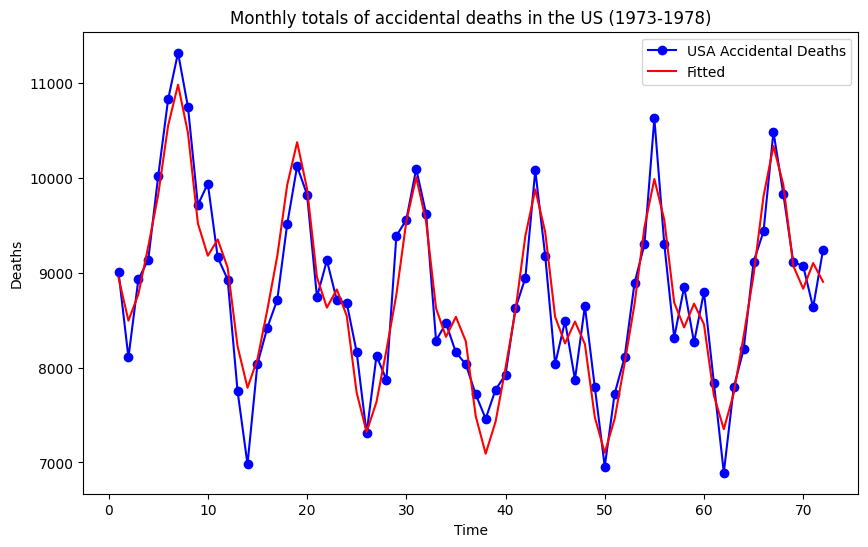

In [25]:
plt.figure(figsize = (10, 6))
plt.plot(t, dt, label = "USA Accidental Deaths", marker = 'o', linestyle = '-', color = 'blue')
plt.plot(t, lin_mod.fittedvalues, label = 'Fitted', color = 'red', linestyle = '-')
plt.xlabel("Time")
plt.ylabel("Deaths")
plt.title("Monthly totals of accidental deaths in the US (1973-1978)")
plt.legend()
plt.show()